># **_Raffi Dilanchian_ -            951811193016**
># **_MohammadHossein Komeili_ -     951811193033**
>### **K_means** clustering algorithm on **AT&T** dataset assignment

## Preparing data

In [1]:
#in case of not having this package
#! pip install pillow

In [27]:
# importing main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from os.path import join
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

In [3]:
# ReadFile method for reading and resizing images

data_folder = "att_faces/s"

def ReadFile(num,index):
    file_path = join(data_folder + str(num), str(index) + ".pgm")
    loaded_image=np.array(plt.imread(file_path))
    image_32x32 = cv2.resize(loaded_image, (32, 32), interpolation=cv2.IMREAD_GRAYSCALE)
    image_1024 = image_32x32.reshape(-1)
    return image_1024
    

In [4]:
X = np.array([],dtype=int)
y = []

for folder in range(1,41):
    for index in range(1,11):
        image_1024 = ReadFile(folder, index)
        X = np.concatenate((X,image_1024),axis=0)
        y.append(folder)
        
X = np.reshape(X, (400, 1024))

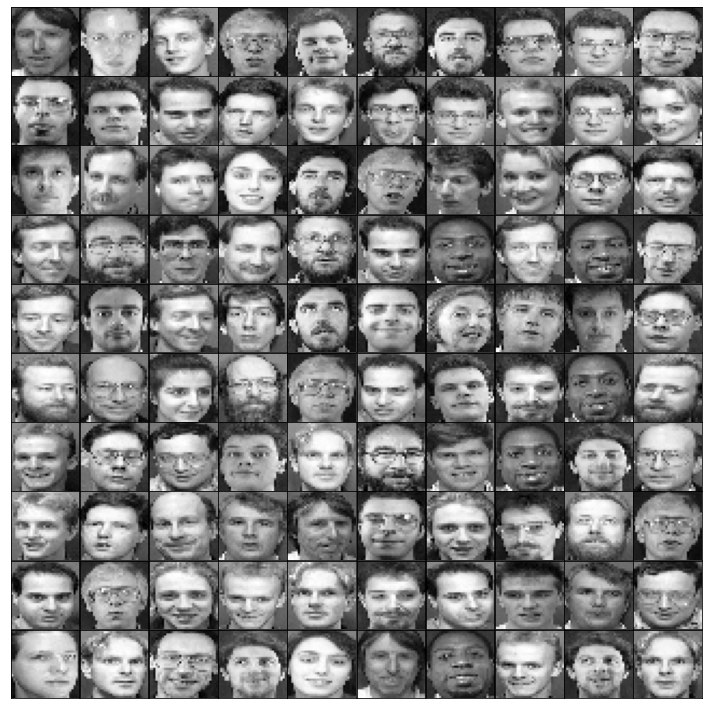

In [5]:
X_samples = np.random.permutation(X)[:100]

fig, axes = plt.subplots(10, 10, figsize=(16, 16))
fig.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, hspace=0.01, wspace=0.01)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_samples[i].reshape((32,32)), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [39]:
print("shape of X: ", np.shape(X))
print("shape of y: ", np.shape(y))

shape of X:  (400, 1024)
shape of y:  (400,)


## Reduction (PCA)

In [28]:
stScaler = StandardScaler()
X = stScaler.fit_transform(X)

In [29]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
U = pca.components_          # Principal Components (directions)
S = pca.explained_variance_  # importance of ecah direction (variances)
print("1st Principal Component: {} ({:.2f})".format(U[0], S[0]))
print("2nd Principal Component: {} ({:.2f})".format(U[1], S[1]))

1st Principal Component: [-0.03201987 -0.0320306  -0.03310122 ...  0.02048914  0.01858923
  0.0220235 ] (168.05)
2nd Principal Component: [-0.04696301 -0.04715656 -0.04645918 ... -0.00859963 -0.01102693
 -0.00071192] (129.06)


In [30]:
print(np.linalg.norm(U[0]))
print(np.linalg.norm(U[1]))
print(np.dot(U[0], U[1]))

1.0000000000000007
1.0000000000000002
-3.5778671692021646e-17


In [80]:
# X_proj = pca.fit_transform(X)  # project from 64 to 2 dimensions
X_proj = pca.transform(X)

print("Shape of original data:  {}".format(X.shape))
print("Shape of projected data: {}".format(X_proj.shape))




Shape of original data:  (400, 1024)
Shape of projected data: (400, 2)


### Visualization of reduced data with actual labels

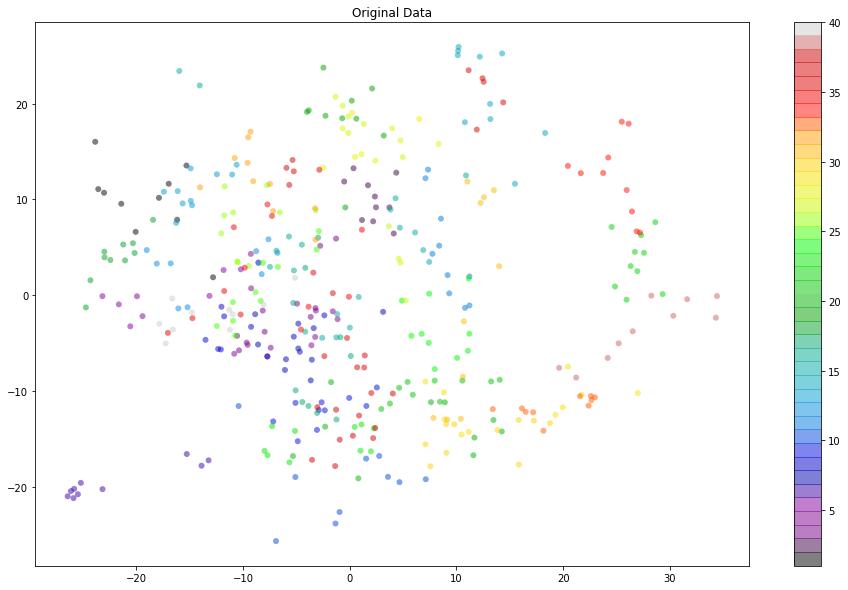

In [81]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], 
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 40))
plt.colorbar()
plt.title('Original Data')
plt.show()

## Clustering
>### K-means
>### FCM

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz
# from fuzzycmeans import FCM

In [92]:

number_of_itterations = 20
mean_accuracy_kmeans = 0
mean_accuracy_FCM = 0
mean_silhouette_kmeans = 0
mean_silhouette_FCM = 0

for itter in range(number_of_itterations):
    kmeans = KMeans(n_clusters=40)
    kmeans_labels = kmeans.fit_predict(X_proj)
    
    labels=np.array(y)
    kmeans_labels_mapping = np.array([],dtype=int)
    
    # Calculate the label mapping array
    for i in range(40): # for each cluster number
        i_indices = np.where(kmeans_labels==i)[0] # get indices of elements from i-th cluster
        i_actual_labels = labels[i_indices.astype(int)] # get actual labels of i-th predicted cluster elements
        most_reapeated_label = np.argmax(np.bincount(i_actual_labels)) # get majority vote of actual labels of i-th cluster
        kmeans_labels_mapping = np.append(kmeans_labels_mapping,most_reapeated_label) # append tu mapping array
        
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_proj, 40, 2, 0.0005, 1000)
    print(u.shape)
    print(u)
    
    cluster_membership = np.argmax(u, axis=0)
    print("cluster membership: ",cluster_membership)
    


    mean_accuracy_kmeans += accuracy_score(y,list(map(lambda x: kmeans_labels_mapping[x],kmeans_labels))) #usnig label mapping
    mean_silhouette_kmeans += silhouette_score(X_proj, kmeans_labels)
#     mean_accuracy_FCM
#     mean_silhouette_FCM
    
mean_accuracy_kmeans /= number_of_itterations
mean_silhouette_kmeans /= number_of_itterations
# mean_accuracy_FCM /= number_of_itterations
# mean_silhouette_FCM /= number_of_itterations
    
    
#print(labels)

(40, 2)
[[5.47820073e-33 1.00000000e-01]
 [2.19128029e-32 1.97215226e-32]
 [2.19128029e-32 1.97215226e-32]
 [2.19128029e-32 1.97215226e-32]
 [1.11111111e-01 4.93038066e-33]
 [2.19128029e-32 1.97215226e-32]
 [5.47820073e-33 1.00000000e-01]
 [2.19128029e-32 1.97215226e-32]
 [2.19128029e-32 1.97215226e-32]
 [1.11111111e-01 4.93038066e-33]
 [5.47820073e-33 1.00000000e-01]
 [2.19128029e-32 1.97215226e-32]
 [5.47820073e-33 1.00000000e-01]
 [2.19128029e-32 1.97215226e-32]
 [2.19128029e-32 1.97215226e-32]
 [2.19128029e-32 1.97215226e-32]
 [2.19128029e-32 1.97215226e-32]
 [1.11111111e-01 4.93038066e-33]
 [1.11111111e-01 4.93038066e-33]
 [2.19128029e-32 1.97215226e-32]
 [5.47820073e-33 1.00000000e-01]
 [1.11111111e-01 4.93038066e-33]
 [1.11111111e-01 4.93038066e-33]
 [1.11111111e-01 4.93038066e-33]
 [5.47820073e-33 1.00000000e-01]
 [2.19128029e-32 1.97215226e-32]
 [5.47820073e-33 1.00000000e-01]
 [1.11111111e-01 4.93038066e-33]
 [2.19128029e-32 1.97215226e-32]
 [5.47820073e-33 1.00000000e-01]
 [

In [83]:
print("mean_accuracy_kmeans: ", mean_accuracy_kmeans)
print("mean_silhouette_kmeans: ", mean_silhouette_kmeans)

mean_accuracy_kmeans:  0.4734999999999999
mean_silhouette_kmeans:  0.410611252417317


### Visualization of clustered data by K-Means 

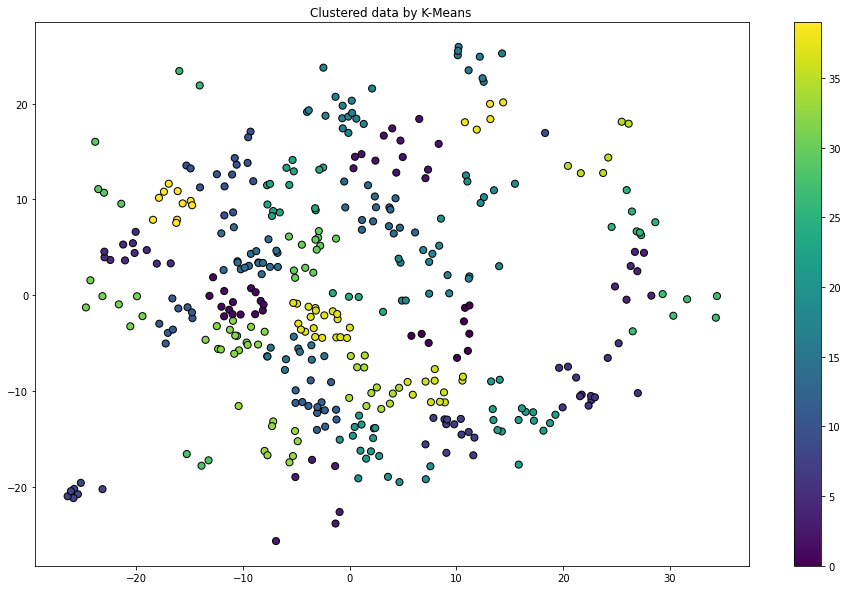

In [84]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], edgecolors='k', s=50, c=kmeans_labels);
plt.colorbar()
plt.title('Clustered data by K-Means ')
plt.show()

### Visualize the cluster centers by K-Means

ValueError: cannot reshape array of size 2 into shape (32,32)

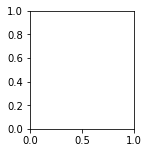

In [85]:
fig = plt.figure(figsize=(22,10))
for i in range(40):
    ax = fig.add_subplot(4,10, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((32,32)), cmap=plt.cm.gray)
    ax.grid(False)
    ax.axis('off')